# PHISING WEBSITE DETECTION

## Project Summary

...........

## Business Understanding

Phishing attacks pose a significant cybersecurity threat by luring users to malicious websites disguised as legitimate ones. Identifying phishing URLs can prevent users from falling victim to these attacks, which often lead to data theft and financial loss.

## Data Understanding

Source: Dataset contains URL-related features with labels indicating legitimacy or malicious intent.


URL Structure: URLLength, Domain, NoOfSubDomain, TLD, CharContinuationRate

Content: Title, TitleMatchScore, HasFavicon, HasSocialNet

Behavior: Redirects (NoOfURLRedirect, NoOfSelfRedirect), popups (NoOfPopup), HasExternalFormSubmit

HTML Elements: NoOfCSS, NoOfJS, NoOfImage

Target Variable: label (0 = legitimate, 1 = malicious)


### Objective

To develop a machine learning model to classify URLs as either legitimate or malicious based on structural, content, and behavioral characteristics. The model aims to achieve high accuracy, precision, and recall in identifying potentially harmful URLs.

### Metric of Success

The metric of success is to achuve and accuracy score of above 90%

# Data Preparation

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


In [2]:
# Load dataset
df = pd.read_csv('PhiUSIIL_Phishing_URL_Dataset.csv', nrows=100000).iloc[:, 1:]
df.head(10)

,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,0.061933,...,0,0,1,34,20,28,119,0,124,1
1,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,0.050207,...,0,0,1,50,9,8,39,0,217,1
2,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,0.064129,...,0,0,1,10,2,7,42,2,5,1
3,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,0.057606,...,1,1,1,3,27,15,22,1,31,1
4,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,0.059441,...,1,0,1,244,15,34,72,1,85,1
5,https://www.globalreporting.org,30,www.globalreporting.org,23,0,org,100.0,1.000000,0.079963,0.060614,...,0,0,1,35,1,11,86,0,14,1
6,https://www.saffronart.com,25,www.saffronart.com,18,0,com,100.0,1.000000,0.522907,0.063549,...,0,0,1,32,4,14,44,2,17,1
7,https://www.nerdscandy.com,25,www.nerdscandy.com,18,0,com,100.0,1.000000,0.522907,0.060486,...,0,0,1,24,2,22,36,0,15,1
8,https://www.hyderabadonline.in,29,www.hyderabadonline.in,22,0,in,100.0,1.000000,0.005084,0.056980,...,0,0,1,71,4,9,40,1,317,1
9,https://www.aap.org,18,www.aap.org,11,0,org,100.0,1.000000,0.079963,0.070497,...,0,0,1,10,1,12,173,6,65,1


In [3]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 55 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   URL                         100000 non-null  object 
 1   URLLength                   100000 non-null  int64  
 2   Domain                      100000 non-null  object 
 3   DomainLength                100000 non-null  int64  
 4   IsDomainIP                  100000 non-null  int64  
 5   TLD                         100000 non-null  object 
 6   URLSimilarityIndex          100000 non-null  float64
 7   CharContinuationRate        100000 non-null  float64
 8   TLDLegitimateProb           100000 non-null  float64
 9   URLCharProb                 100000 non-null  float64
 10  TLDLength                   100000 non-null  int64  
 11  NoOfSubDomain               100000 non-null  int64  
 12  HasObfuscation              100000 non-null  int64  
 13  NoOfObfuscatedC

In [4]:
# # Summary statistics to get insights into the distribution of each feature.
df.describe()

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,33.893520,21.333290,0.002410,79.198871,0.849902,0.260993,0.055930,2.762840,1.167210,0.001920,...,0.238570,0.024210,0.488370,26.280980,6.531620,10.597280,65.113400,2.376540,48.865850,0.578490
std,35.550477,8.903639,0.049033,28.419964,0.214186,0.251452,0.010532,0.594137,0.588841,0.043776,...,0.426211,0.153701,0.499867,81.716749,113.999266,27.627117,165.362177,14.529219,126.417083,0.493803
min,13.000000,4.000000,0.000000,0.155574,0.000000,0.000000,0.001223,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.000000,0.000000,58.883042,0.692308,0.006411,0.051134,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,27.000000,20.000000,0.000000,100.000000,1.000000,0.079963,0.058116,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,9.000000,2.000000,6.000000,14.000000,0.000000,10.000000,1.000000
75%,33.000000,24.000000,0.000000,100.000000,1.000000,0.522907,0.062972,3.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,30.000000,8.000000,15.000000,89.000000,1.000000,58.000000,1.000000
max,5794.000000,110.000000,1.000000,100.000000,1.000000,0.522907,0.088738,13.000000,10.000000,1.000000,...,1.000000,1.000000,1.000000,8956.000000,35820.000000,6957.000000,26596.000000,1336.000000,19147.000000,1.000000


In [5]:
# Describing the dataset object (categorical) features
df.describe(include='O')

,URL,Domain,TLD,Title
count,100000,100000,100000,100000
unique,99932,95395,560,84835
top,https://sportof.xyz/wp/privacy-policy/,ipfs.io,com,0
freq,2,463,47804,14150


# Data Preprocessing

In [6]:
# Check the column names
df.columns

Index(['URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP', 'TLD',
       'URLSimilarityIndex', 'CharContinuationRate', 'TLDLegitimateProb',
       'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'HasObfuscation',
       'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL',
       'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL',
       'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL',
       'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'IsHTTPS',
       'LineOfCode', 'LargestLineLength', 'HasTitle', 'Title',
       'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon', 'Robots',
       'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription',
       'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit', 'HasSocialNet',
       'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay',
       'Crypto', 'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS',
       'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef', 'labe

In [7]:

# Check for duplicated values
df.duplicated().sum()

0

In [8]:
# Check for NaN values
df.isna().sum()

URL                           0
URLLength                     0
Domain                        0
DomainLength                  0
IsDomainIP                    0
TLD                           0
URLSimilarityIndex            0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDegitsInURL               0
DegitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
HasTitle                      0
Title                         0
DomainTitleMatchScore         0
URLTitleMatchScore            0
HasFavic

The dataset had no Missing Values

# Exploratory Data Analysis

This code is a comprehensive exploratory data analysis (EDA) pipeline for a dataset.
 It consists of eight functions that perform various tasks: 
 `load_and_examine_data` provides an initial overview of the dataset, 
 `analyze_target_distribution` examines the distribution of the target variable, 
 `analyze_correlations` investigates correlations between features, 
 `analyze_categorical_features` visualizes the distribution of categorical features,
 `analyze_numeric_distributions` visualize the distributions of numeric features,
 `identify_outliers` detects outliers in numeric features, and `perform_eda` orchestrates the entire EDA process. The pipeline uses various visualization libraries, including Matplotlib and Seaborn, to provide a thorough understanding of the dataset's characteristics.

In [9]:

def load_and_examine_data(df):
    """Initial data examination"""
    print("Dataset Shape:", df.shape)
    print("\nMissing Values:\n", df.isnull().sum()[df.isnull().sum() > 0])
    
    # Basic statistics for numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    print("\nNumeric Columns Summary:\n", df[numeric_cols].describe())
    
    return numeric_cols

def analyze_target_distribution(df):
    """Analyze target variable distribution"""
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x='label')
    plt.title('Distribution of Phishing vs Legitimate Websites')
    plt.show()
    
    print("\nClass Distribution:")
    print(df['label'].value_counts(normalize=True))

def analyze_correlations(df, numeric_cols):
    """Analyze correlations between features"""
    plt.figure(figsize=(10, 10))
    correlation_matrix = df[numeric_cols].corr()
    sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, annot=False)
    plt.title('Feature Correlation Matrix')
    plt.tight_layout()
    plt.show()
    
    # Find highest correlations
    correlations = correlation_matrix.unstack()
    sorted_correlations = correlations.sort_values(key=abs, ascending=False)
    high_correlations = sorted_correlations[sorted_correlations != 1.0][:20]
    print("\nTop 20 Feature Correlations:")
    print(high_correlations)

def analyze_categorical_features(df):
    """Analyze categorical and binary features"""
    binary_cols = ['IsHTTPS', 'IsDomainIP', 'HasTitle', 'HasFavicon', 'IsResponsive',
                   'HasDescription', 'HasExternalFormSubmit', 'HasSocialNet',
                   'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField',
                   'HasCopyrightInfo']
    
    fig, axes = plt.subplots(4, 3, figsize=(15, 15))
    axes = axes.ravel()
    
    for idx, col in enumerate(binary_cols):
        sns.countplot(data=df, x=col, hue='label', ax=axes[idx])
        axes[idx].set_title(f'Distribution of {col}')
        axes[idx].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

def analyze_numeric_distributions(df, numeric_cols):
    """Analyze distributions of numeric features"""
    # Select important numeric features
    important_numeric_cols = ['URLLength', 'DomainLength', 'NoOfSubDomain',
                            'ObfuscationRatio', 'NoOfLettersInURL', 'NoOfDegitsInURL',
                            'NoOfPopup', 'NoOfiFrame', 'NoOfImage', 'NoOfExternalRef']
    
    fig, axes = plt.subplots(5, 2, figsize=(15, 20))
    axes = axes.ravel()
    
    for idx, col in enumerate(important_numeric_cols):
        sns.boxplot(data=df, x='label', y=col, ax=axes[idx])
        axes[idx].set_title(f'Distribution of {col} by Label')
        axes[idx].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

def identify_outliers(df, numeric_cols):
    """Identify outliers in numeric features"""
    outliers_summary = {}
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))][col]
        if len(outliers) > 0:
            outliers_summary[col] = len(outliers)
    
    print("\nNumber of Outliers per Feature:")
    for col, count in outliers_summary.items():
        print(f"{col}: {count} outliers")

def perform_eda(df):
    """Main function to perform EDA"""
    # Initial examination
    numeric_cols = load_and_examine_data(df)
    
    # Target distribution
    analyze_target_distribution(df)
    
    # Correlation analysis
    analyze_correlations(df, numeric_cols)
    
    # Categorical features analysis
    analyze_categorical_features(df)
    
    # Numeric distributions
    analyze_numeric_distributions(df, numeric_cols)
    
    # Outlier analysis
    identify_outliers(df, numeric_cols)



Dataset Shape: (100000, 55)

Missing Values:
 Series([], dtype: int64)

Numeric Columns Summary:
            URLLength   DomainLength     IsDomainIP  URLSimilarityIndex  \
count  100000.000000  100000.000000  100000.000000       100000.000000   
mean       33.893520      21.333290       0.002410           79.198871   
std        35.550477       8.903639       0.049033           28.419964   
min        13.000000       4.000000       0.000000            0.155574   
25%        23.000000      16.000000       0.000000           58.883042   
50%        27.000000      20.000000       0.000000          100.000000   
75%        33.000000      24.000000       0.000000          100.000000   
max      5794.000000     110.000000       1.000000          100.000000   

       CharContinuationRate  TLDLegitimateProb    URLCharProb      TLDLength  \
count         100000.000000      100000.000000  100000.000000  100000.000000   
mean               0.849902           0.260993       0.055930       2.76284

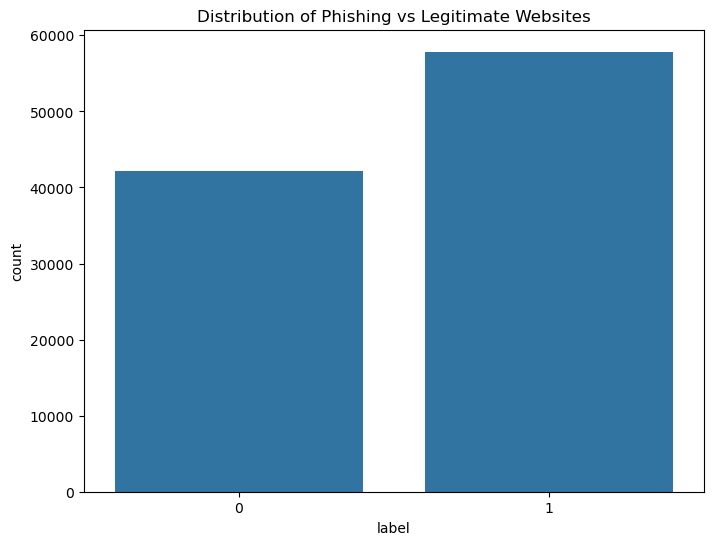


Class Distribution:
label
1    0.57849
0    0.42151
Name: proportion, dtype: float64


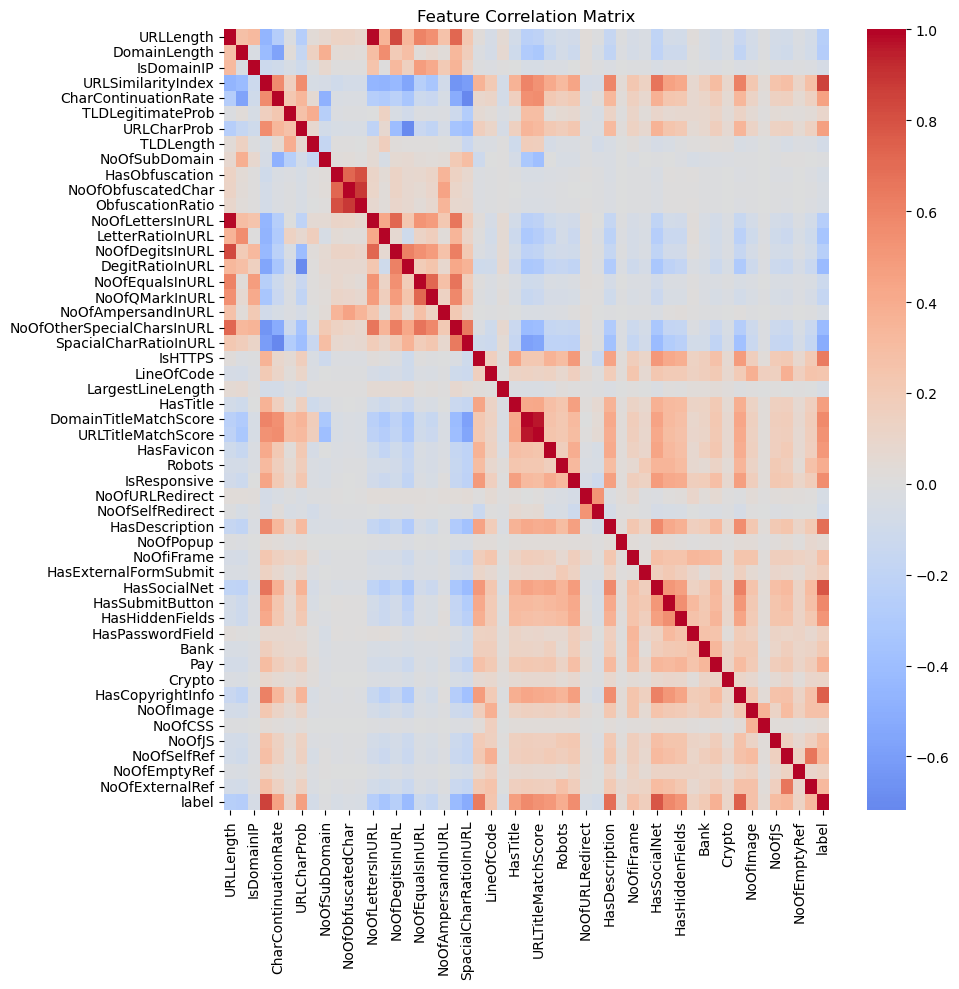


Top 20 Feature Correlations:
URLLength              NoOfLettersInURL         0.981950
NoOfLettersInURL       URLLength                0.981950
DomainTitleMatchScore  URLTitleMatchScore       0.963856
URLTitleMatchScore     DomainTitleMatchScore    0.963856
ObfuscationRatio       NoOfObfuscatedChar       0.885333
NoOfObfuscatedChar     ObfuscationRatio         0.885333
label                  URLSimilarityIndex       0.857451
URLSimilarityIndex     label                    0.857451
NoOfDegitsInURL        URLLength                0.828338
URLLength              NoOfDegitsInURL          0.828338
ObfuscationRatio       HasObfuscation           0.805626
HasObfuscation         ObfuscationRatio         0.805626
label                  HasSocialNet             0.782164
HasSocialNet           label                    0.782164
HasCopyrightInfo       label                    0.745898
label                  HasCopyrightInfo         0.745898
NoOfDegitsInURL        NoOfLettersInURL         0.722102
N

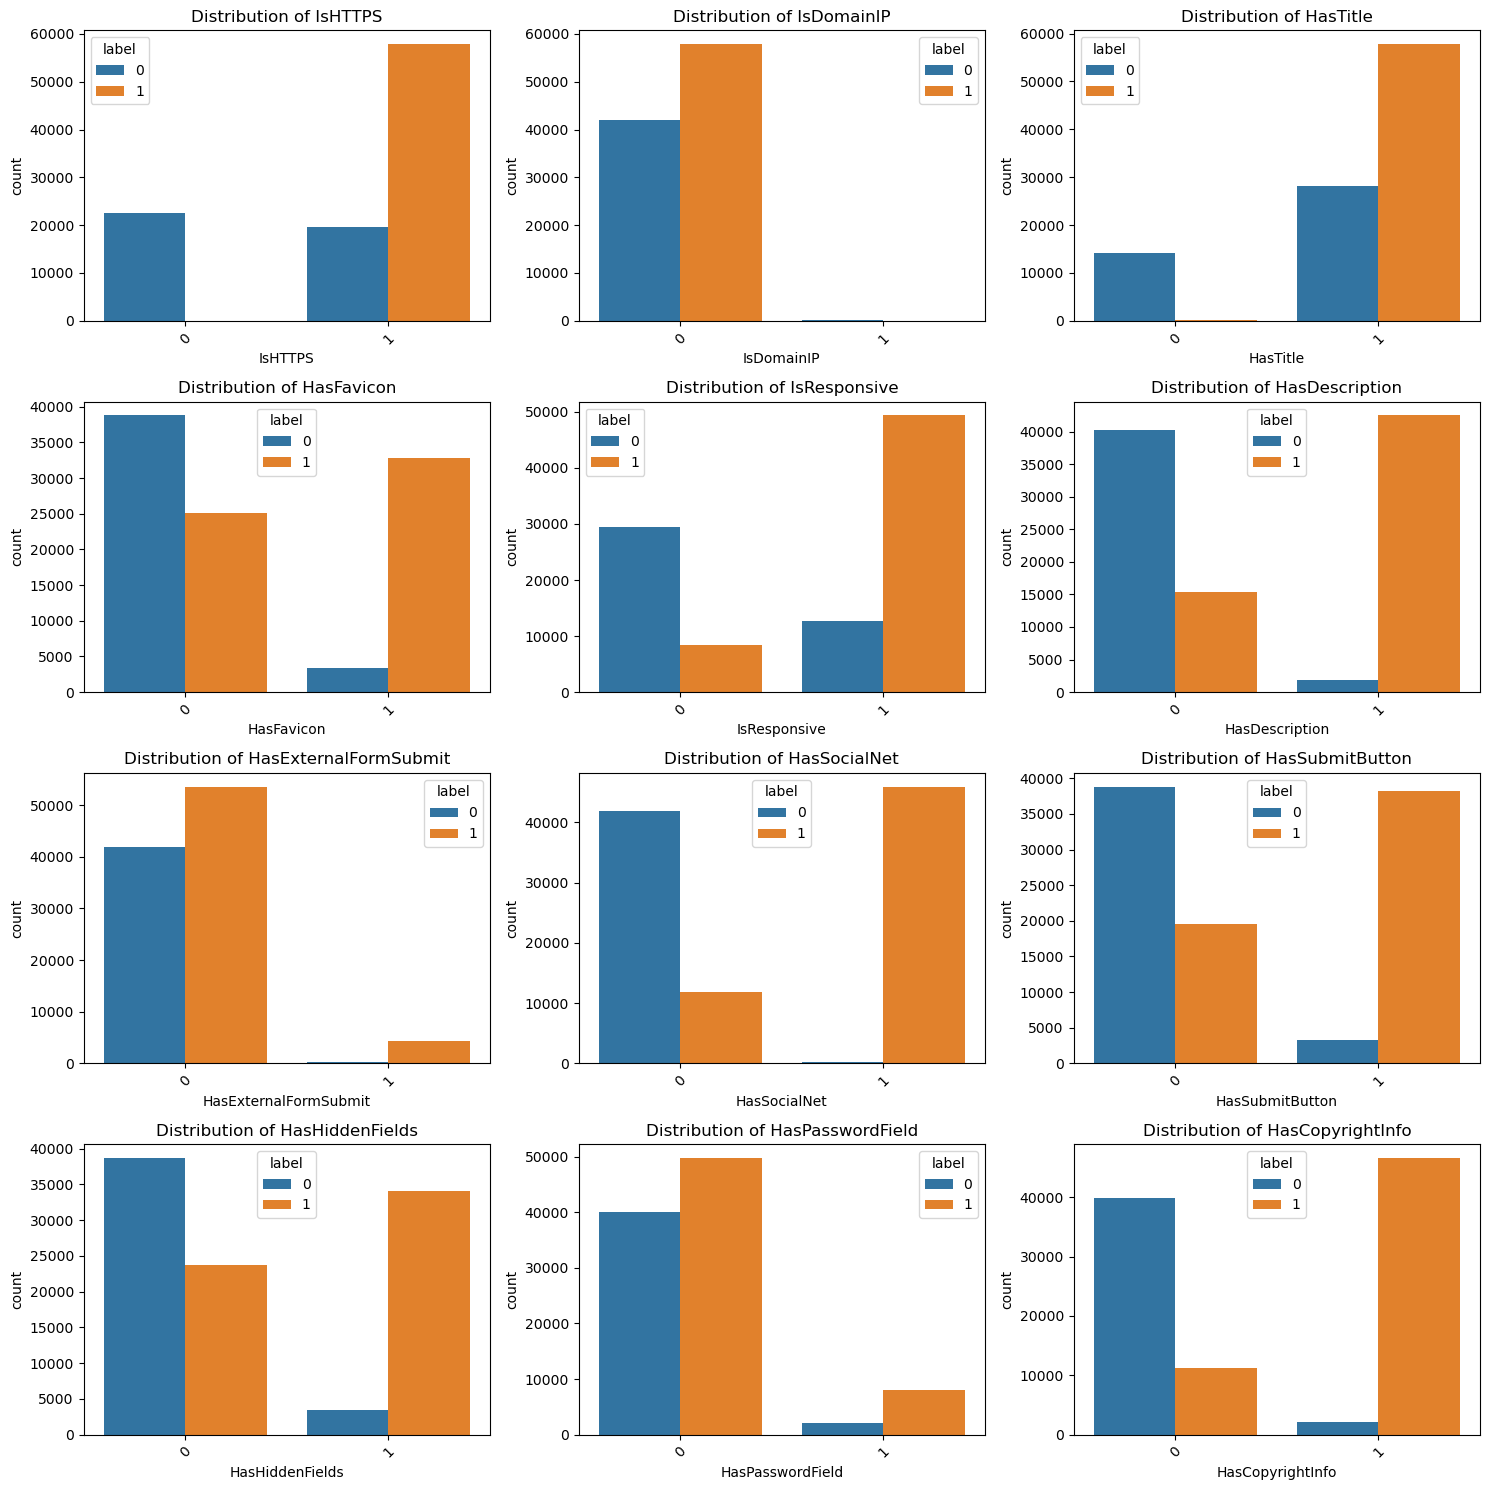

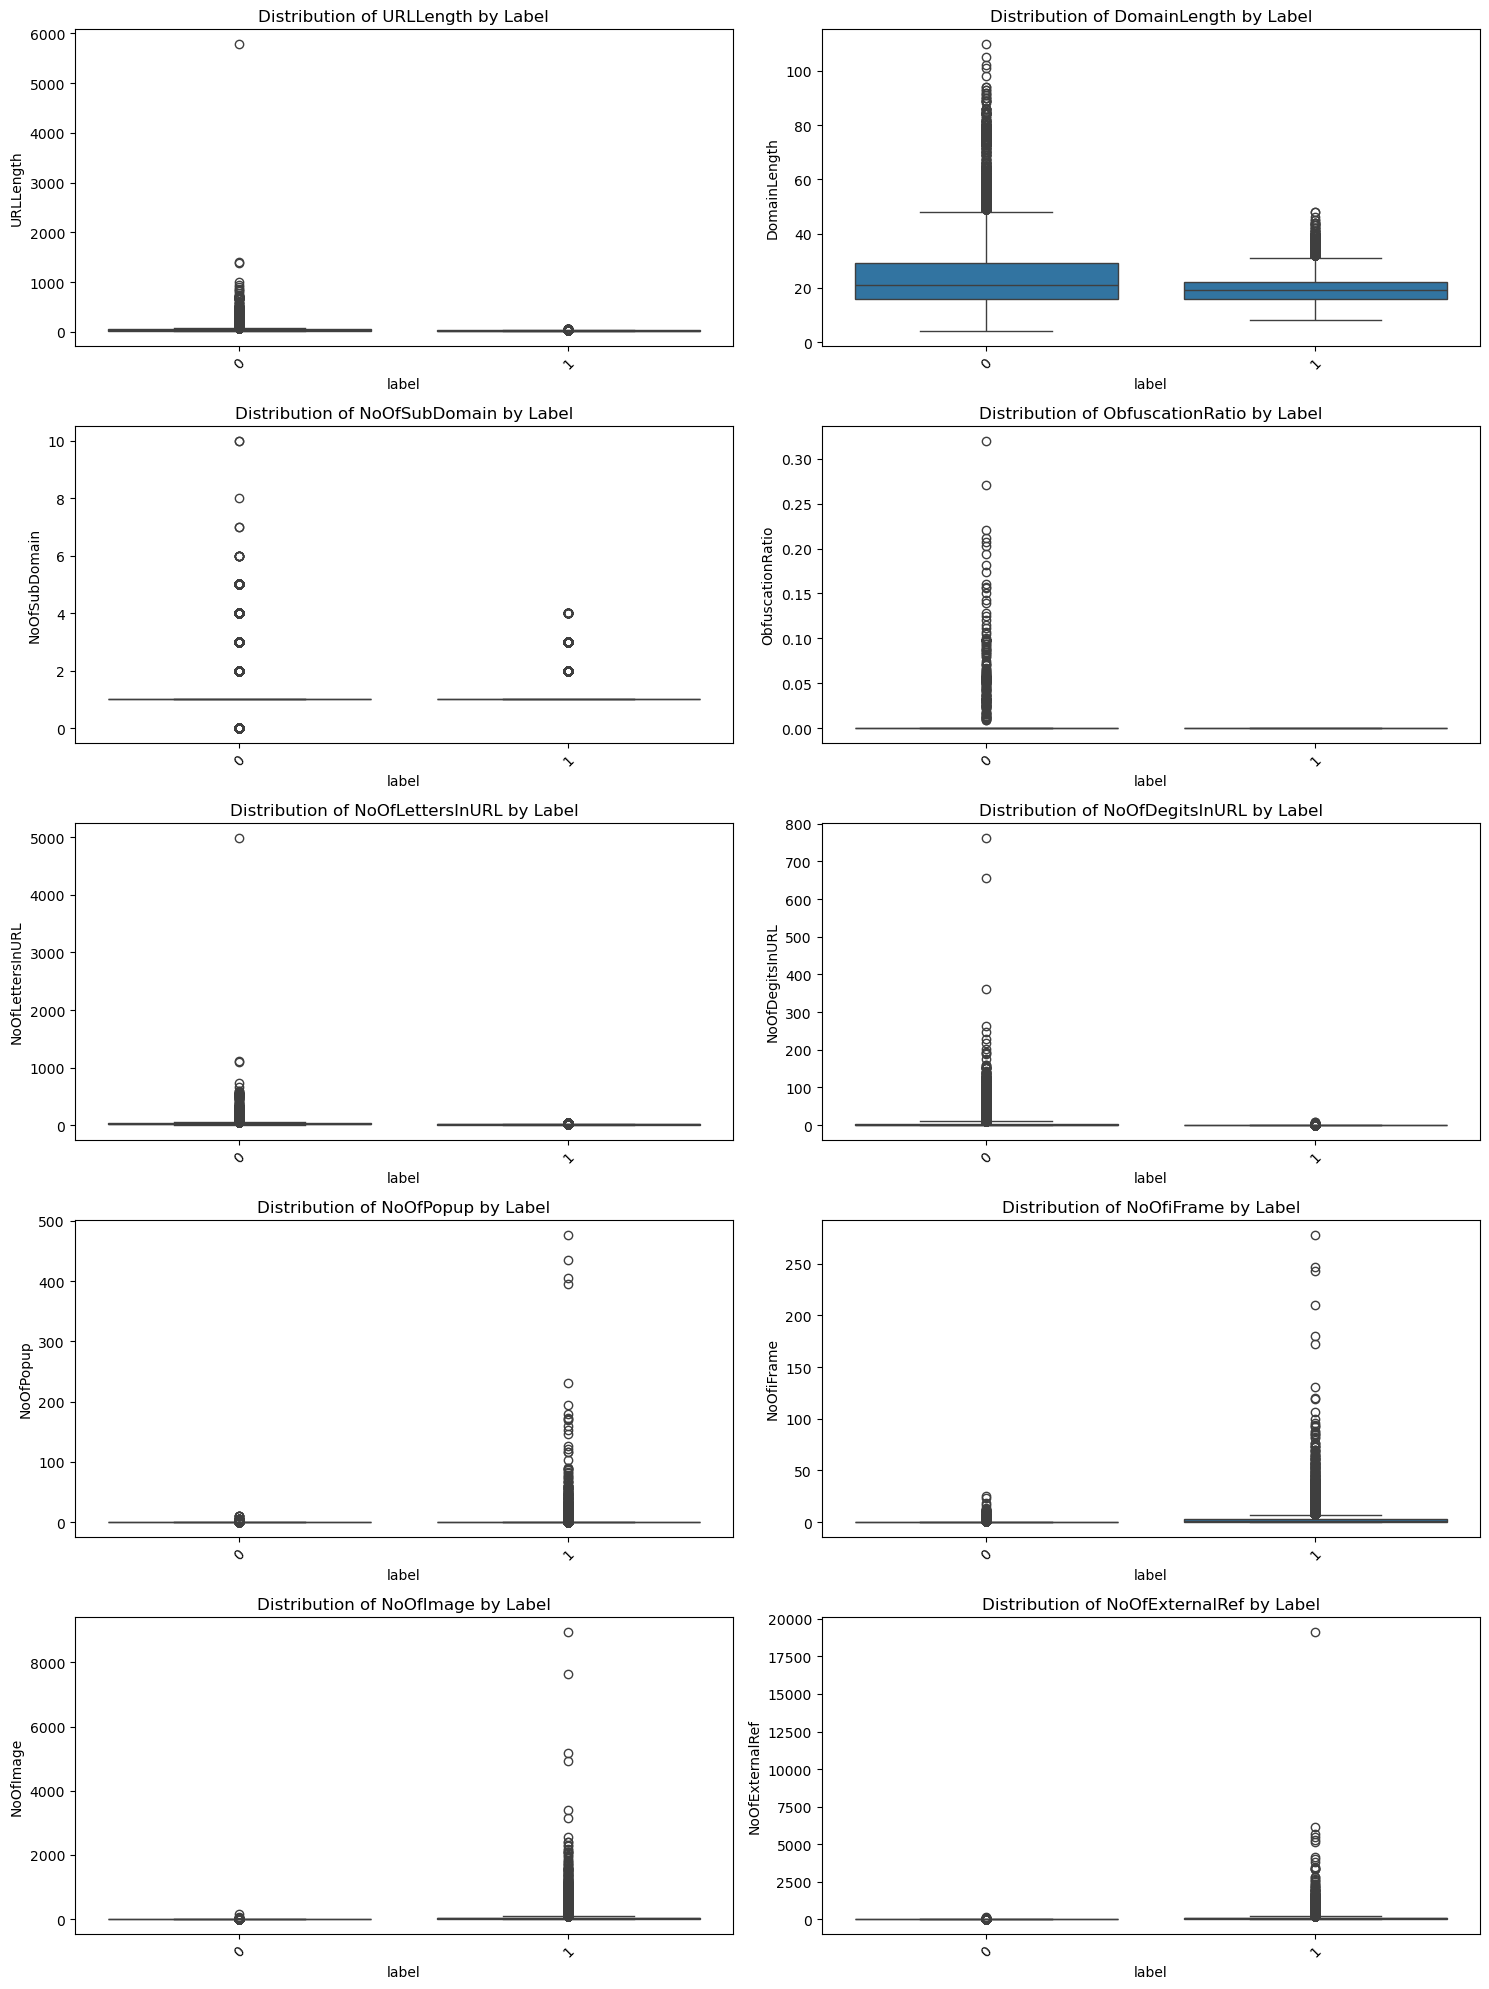


Number of Outliers per Feature:
URLLength: 9840 outliers
DomainLength: 5485 outliers
IsDomainIP: 241 outliers
CharContinuationRate: 682 outliers
URLCharProb: 3999 outliers
TLDLength: 854 outliers
NoOfSubDomain: 23903 outliers
HasObfuscation: 192 outliers
NoOfObfuscatedChar: 192 outliers
ObfuscationRatio: 192 outliers
NoOfLettersInURL: 7694 outliers
LetterRatioInURL: 619 outliers
NoOfDegitsInURL: 20863 outliers
DegitRatioInURL: 20863 outliers
NoOfEqualsInURL: 2126 outliers
NoOfQMarkInURL: 2421 outliers
NoOfAmpersandInURL: 351 outliers
NoOfOtherSpecialCharsInURL: 16119 outliers
SpacialCharRatioInURL: 1760 outliers
IsHTTPS: 22580 outliers
LineOfCode: 8157 outliers
LargestLineLength: 7131 outliers
HasTitle: 14145 outliers
NoOfURLRedirect: 13232 outliers
NoOfSelfRedirect: 4097 outliers
NoOfPopup: 5698 outliers
NoOfiFrame: 14887 outliers
HasExternalFormSubmit: 4403 outliers
HasPasswordField: 10083 outliers
Bank: 12670 outliers
Pay: 23857 outliers
Crypto: 2421 outliers
NoOfImage: 7430 outlie

In [10]:
perform_eda(df)

## Feature Engineering

### Removing Outliers using Interquartile Range technique (IQR)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

class FeaturePreprocessor:
    def __init__(self):
        self.binary_columns = []
        self.numerical_columns = []
        self.categorical_columns = []
        self.outlier_thresholds = {}
        
    def identify_feature_types(self, df):
        """Identify binary, numerical, and categorical columns"""
        # Reset previous classifications
        self.binary_columns = []
        self.numerical_columns = []
        self.categorical_columns = []
        
        # Get all numeric columns
        numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
        
        for column in df.columns:
            unique_values = df[column].nunique()
            
            # Skip the target variable
            if column == 'label':
                continue
                
            # Binary columns (including boolean and binary numeric)
            if unique_values == 2:
                self.binary_columns.append(column)
            
            # Numeric columns (excluding binary)
            elif column in numeric_cols and unique_values > 2:
                self.numerical_columns.append(column)
            
            # Categorical columns (including strings)
            else:
                self.categorical_columns.append(column)
        
        # Print summary
        print("Feature Type Summary:")
        print(f"\nBinary Features ({len(self.binary_columns)}):")
        for col in self.binary_columns:
            print(f"- {col}: {df[col].unique()}")
            
        print(f"\nNumerical Features ({len(self.numerical_columns)}):")
        for col in self.numerical_columns:
            print(f"- {col}: range [{df[col].min():.2f}, {df[col].max():.2f}]")
            
        print(f"\nCategorical Features ({len(self.categorical_columns)}):")
        for col in self.categorical_columns:
            print(f"- {col}: {df[col].nunique()} unique values")
            
        return {
            'binary': self.binary_columns,
            'numerical': self.numerical_columns,
            'categorical': self.categorical_columns
        }
    
    def analyze_binary_features(self, df):
        """Analyze distribution of binary features"""
        if not self.binary_columns:
            print("No binary features identified. Run identify_feature_types first.")
            return
            
        n_cols = 3
        n_rows = (len(self.binary_columns) + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 5*n_rows))
        axes = axes.flatten() if n_rows * n_cols > 1 else [axes]
        
        for idx, column in enumerate(self.binary_columns):
            sns.countplot(data=df, x=column, ax=axes[idx])
            axes[idx].set_title(f'Distribution of {column}')
            # Add percentage labels
            total = len(df[column])
            for i in axes[idx].containers:
                axes[idx].bar_label(i, fmt='%.1f%%', 
                                  labels=[count/total*100 for count in i.datavalues])
        
        # Remove empty subplots
        for idx in range(len(self.binary_columns), len(axes)):
            if n_rows * n_cols > 1:
                fig.delaxes(axes[idx])
            
        plt.tight_layout()
        plt.show()
        
        # Print detailed statistics
        print("\nBinary Feature Statistics:")
        for column in self.binary_columns:
            value_counts = df[column].value_counts(normalize=True) * 100
            print(f"\n{column}:")
            for value, percentage in value_counts.items():
                print(f"- Value {value}: {percentage:.2f}%")
    
    def remove_outliers(self, df):
        """Remove outliers from numerical features while preserving binary features"""
        if not self.numerical_columns:
            print("No numerical features identified. Run identify_feature_types first.")
            return df
            
        df_clean = df.copy()
        total_rows_before = len(df_clean)
        removed_counts = {}
        
        # Calculate outlier thresholds for numerical features
        for column in self.numerical_columns:
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Store thresholds
            self.outlier_thresholds[column] = {
                'Q1': Q1,
                'Q3': Q3,
                'IQR': IQR,
                'lower_bound': lower_bound,
                'upper_bound': upper_bound
            }
            
            # Count outliers
            outliers = df_clean[
                (df_clean[column] < lower_bound) |
                (df_clean[column] > upper_bound)
            ]
            removed_counts[column] = len(outliers)
            
            # Remove outliers
            df_clean = df_clean[
                (df_clean[column] >= lower_bound) &
                (df_clean[column] <= upper_bound)
            ]
        
        total_rows_after = len(df_clean)
        
        # Print summary
        print("\nOutlier Removal Summary:")
        print(f"Total rows before: {total_rows_before}")
        print(f"Total rows after: {total_rows_after}")
        print(f"Rows removed: {total_rows_before - total_rows_after}")
        print(f"Percentage removed: {((total_rows_before - total_rows_after) / total_rows_before) * 100:.2f}%")
        
        print("\nOutliers removed by column:")
        for column, count in removed_counts.items():
            print(f"- {column}: {count} outliers removed")
            
        return df_clean
    
    def visualize_distributions(self, df, df_cleaned=None):
        """Visualize distributions of numerical features before and after cleaning"""
        if not self.numerical_columns:
            print("No numerical features identified. Run identify_feature_types first.")
            return
            
        n_cols = 2 if df_cleaned is not None else 1
        n_rows = len(self.numerical_columns)
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(7*n_cols, 5*n_rows))
        if n_rows == 1:
            axes = axes.reshape(1, -1)
        
        for idx, column in enumerate(self.numerical_columns):
            # Original distribution
            sns.boxplot(data=df, y=column, ax=axes[idx, 0])
            axes[idx, 0].set_title(f'{column} (Original)')
            
            # Cleaned distribution (if provided)
            if df_cleaned is not None:
                sns.boxplot(data=df_cleaned, y=column, ax=axes[idx, 1])
                axes[idx, 1].set_title(f'{column} (After Cleaning)')
        
        plt.tight_layout()
        plt.show()
    
    def process_features(self, df, remove_outliers=True):
        """Complete feature processing pipeline"""
        # Identify feature types
        print("Step 1: Identifying feature types...")
        self.identify_feature_types(df)
        
        # Analyze binary features
        print("\nStep 2: Analyzing binary features...")
        self.analyze_binary_features(df)
        
        # Handle outliers if requested
        if remove_outliers:
            print("\nStep 3: Removing outliers from numerical features...")
            df_cleaned = self.remove_outliers(df)
            
            print("\nStep 4: Visualizing distributions before and after cleaning...")
            self.visualize_distributions(df, df_cleaned)
            
            return df_cleaned
        else:
            print("\nStep 3: Visualizing original distributions...")
            self.visualize_distributions(df)
            return df




Step 1: Identifying feature types...
Feature Type Summary:

Binary Features (19):
- IsDomainIP: [0 1]
- HasObfuscation: [0 1]
- IsHTTPS: [1 0]
- HasTitle: [1 0]
- HasFavicon: [0 1]
- Robots: [1 0]
- IsResponsive: [1 0]
- NoOfURLRedirect: [0 1]
- NoOfSelfRedirect: [0 1]
- HasDescription: [0 1]
- HasExternalFormSubmit: [0 1]
- HasSocialNet: [0 1]
- HasSubmitButton: [1 0]
- HasHiddenFields: [1 0]
- HasPasswordField: [0 1]
- Bank: [1 0]
- Pay: [0 1]
- Crypto: [0 1]
- HasCopyrightInfo: [1 0]

Numerical Features (31):
- URLLength: range [13.00, 5794.00]
- DomainLength: range [4.00, 110.00]
- URLSimilarityIndex: range [0.16, 100.00]
- CharContinuationRate: range [0.00, 1.00]
- TLDLegitimateProb: range [0.00, 0.52]
- URLCharProb: range [0.00, 0.09]
- TLDLength: range [2.00, 13.00]
- NoOfSubDomain: range [0.00, 10.00]
- NoOfObfuscatedChar: range [0.00, 57.00]
- ObfuscationRatio: range [0.00, 0.32]
- NoOfLettersInURL: range [0.00, 4992.00]
- LetterRatioInURL: range [0.00, 0.93]
- NoOfDegitsInURL

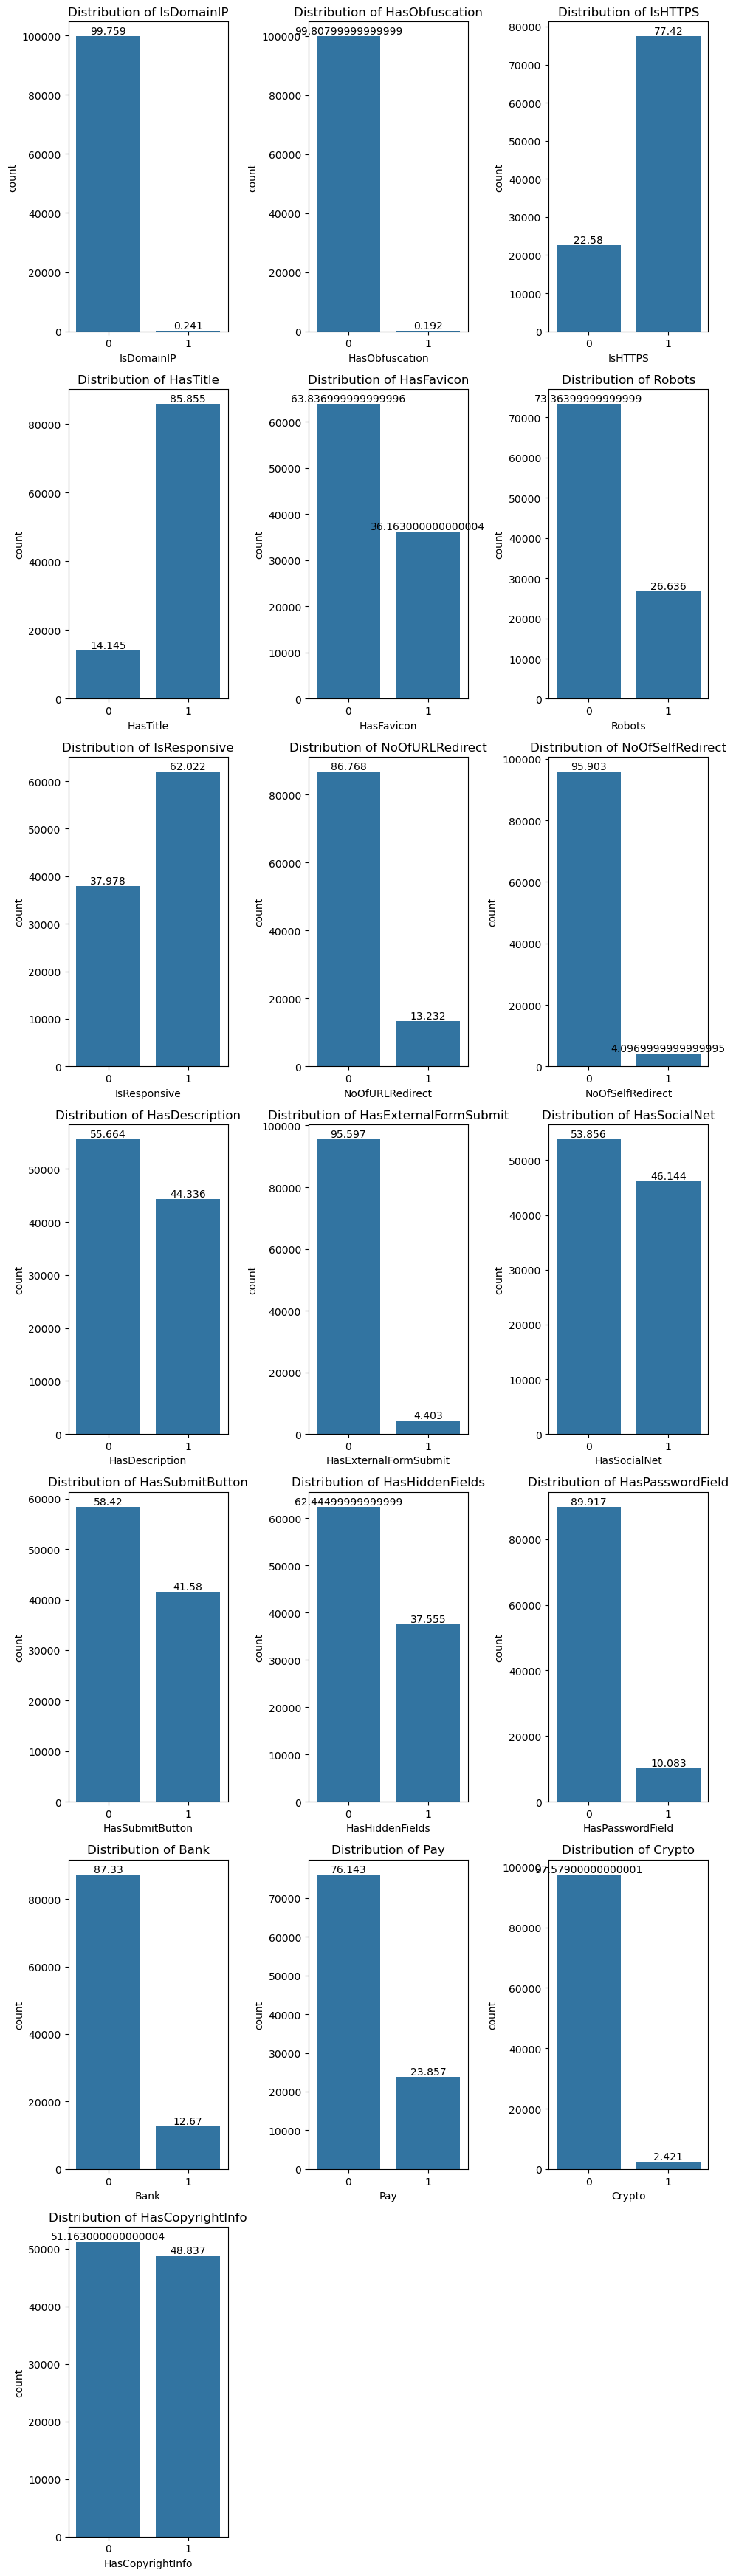


Binary Feature Statistics:

IsDomainIP:
- Value 0: 99.76%
- Value 1: 0.24%

HasObfuscation:
- Value 0: 99.81%
- Value 1: 0.19%

IsHTTPS:
- Value 1: 77.42%
- Value 0: 22.58%

HasTitle:
- Value 1: 85.86%
- Value 0: 14.14%

HasFavicon:
- Value 0: 63.84%
- Value 1: 36.16%

Robots:
- Value 0: 73.36%
- Value 1: 26.64%

IsResponsive:
- Value 1: 62.02%
- Value 0: 37.98%

NoOfURLRedirect:
- Value 0: 86.77%
- Value 1: 13.23%

NoOfSelfRedirect:
- Value 0: 95.90%
- Value 1: 4.10%

HasDescription:
- Value 0: 55.66%
- Value 1: 44.34%

HasExternalFormSubmit:
- Value 0: 95.60%
- Value 1: 4.40%

HasSocialNet:
- Value 0: 53.86%
- Value 1: 46.14%

HasSubmitButton:
- Value 0: 58.42%
- Value 1: 41.58%

HasHiddenFields:
- Value 0: 62.44%
- Value 1: 37.55%

HasPasswordField:
- Value 0: 89.92%
- Value 1: 10.08%

Bank:
- Value 0: 87.33%
- Value 1: 12.67%

Pay:
- Value 0: 76.14%
- Value 1: 23.86%

Crypto:
- Value 0: 97.58%
- Value 1: 2.42%

HasCopyrightInfo:
- Value 0: 51.16%
- Value 1: 48.84%

Step 3: Removin

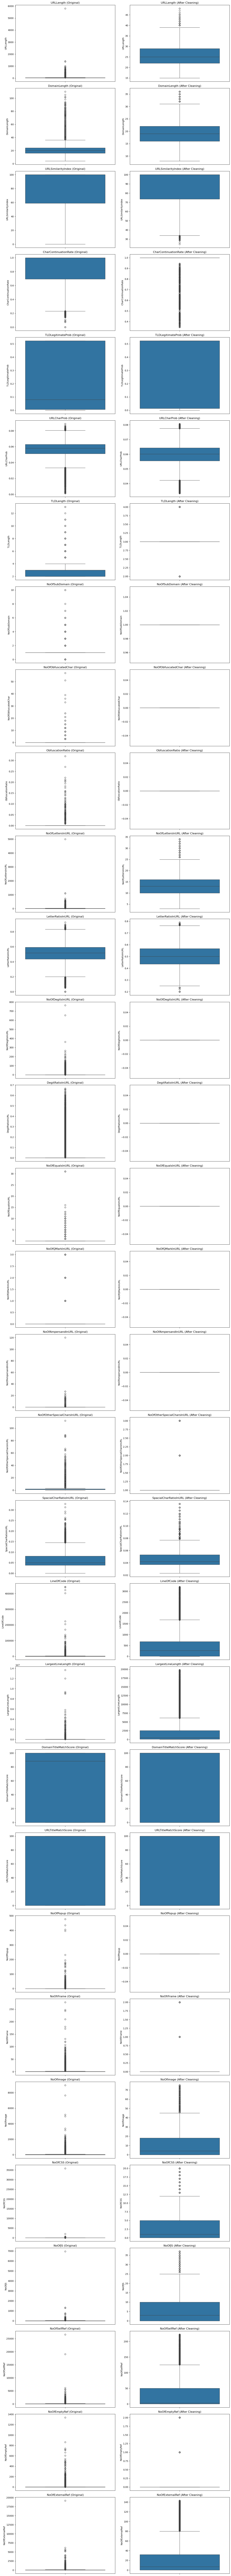

In [12]:
preprocessor = FeaturePreprocessor()
df_cleaned = preprocessor.process_features(df)

Comapring the original and cleaned dataset

In [13]:
df.describe()

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,33.893520,21.333290,0.002410,79.198871,0.849902,0.260993,0.055930,2.762840,1.167210,0.001920,...,0.238570,0.024210,0.488370,26.280980,6.531620,10.597280,65.113400,2.376540,48.865850,0.578490
std,35.550477,8.903639,0.049033,28.419964,0.214186,0.251452,0.010532,0.594137,0.588841,0.043776,...,0.426211,0.153701,0.499867,81.716749,113.999266,27.627117,165.362177,14.529219,126.417083,0.493803
min,13.000000,4.000000,0.000000,0.155574,0.000000,0.000000,0.001223,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.000000,0.000000,58.883042,0.692308,0.006411,0.051134,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,27.000000,20.000000,0.000000,100.000000,1.000000,0.079963,0.058116,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,9.000000,2.000000,6.000000,14.000000,0.000000,10.000000,1.000000
75%,33.000000,24.000000,0.000000,100.000000,1.000000,0.522907,0.062972,3.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,30.000000,8.000000,15.000000,89.000000,1.000000,58.000000,1.000000
max,5794.000000,110.000000,1.000000,100.000000,1.000000,0.522907,0.088738,13.000000,10.000000,1.000000,...,1.000000,1.000000,1.000000,8956.000000,35820.000000,6957.000000,26596.000000,1336.000000,19147.000000,1.000000


In [14]:
df_cleaned.describe()

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
count,29210.000000,29210.000000,29210.0,29210.000000,29210.000000,2.921000e+04,29210.000000,29210.000000,29210.0,29210.0,...,29210.000000,29210.000000,29210.000000,29210.000000,29210.000000,29210.000000,29210.000000,29210.000000,29210.000000,29210.000000
mean,26.046868,19.183704,0.0,87.023499,0.936139,2.989237e-01,0.059490,2.800650,1.0,0.0,...,0.148853,0.014892,0.444129,11.379391,3.214379,6.057651,29.088805,0.222116,22.370010,0.571003
std,5.080248,4.879521,0.0,17.364299,0.145195,2.472648e-01,0.007195,0.461841,0.0,0.0,...,0.355950,0.121123,0.496877,15.139600,4.450540,7.515811,40.813357,0.533416,32.484944,0.494941
min,15.000000,8.000000,0.0,24.609734,0.347826,8.000000e-07,0.033385,2.000000,1.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,16.000000,0.0,73.469388,1.000000,1.292680e-02,0.055454,3.000000,1.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,19.000000,0.0,100.000000,1.000000,5.229071e-01,0.060155,3.000000,1.0,0.0,...,0.000000,0.000000,0.000000,4.000000,1.000000,3.000000,3.000000,0.000000,7.000000,1.000000
75%,29.000000,22.000000,0.0,100.000000,1.000000,5.229071e-01,0.064295,3.000000,1.0,0.0,...,0.000000,0.000000,1.000000,18.000000,5.000000,10.000000,50.000000,0.000000,32.000000,1.000000
max,48.000000,36.000000,0.0,100.000000,1.000000,5.229071e-01,0.080622,4.000000,1.0,0.0,...,1.000000,1.000000,1.000000,75.000000,20.000000,37.000000,222.000000,2.000000,143.000000,1.000000


### Dealing with Multi colinearity using the Correlation Matrix

In [15]:
#select Numerical Data
numerical_data = df_cleaned.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_data.corr(method='pearson')

In [16]:
# Set the correlation threshold
threshold = 0.9

# Find pairs of features with correlation above the threshold
high_corr_pairs = [(i, j) for i in correlation_matrix.columns for j in correlation_matrix.columns
                   if i != j and abs(correlation_matrix.loc[i, j]) > threshold]


In [17]:
# Drop one feature from each highly correlated pair
features_to_drop = set()

for (feature1, feature2) in high_corr_pairs:
    # Keep the feature with higher variance or based on domain knowledge
    if df_cleaned[feature1].var() > df_cleaned[feature2].var():
        features_to_drop.add(feature2)
    else:
        features_to_drop.add(feature1)

# Drop the redundant features from the DataFrame
df_reduced = df_cleaned.drop(columns=features_to_drop)


In [18]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29210 entries, 0 to 99998
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   URL                         29210 non-null  object 
 1   Domain                      29210 non-null  object 
 2   IsDomainIP                  29210 non-null  int64  
 3   TLD                         29210 non-null  object 
 4   URLSimilarityIndex          29210 non-null  float64
 5   TLDLegitimateProb           29210 non-null  float64
 6   URLCharProb                 29210 non-null  float64
 7   TLDLength                   29210 non-null  int64  
 8   NoOfSubDomain               29210 non-null  int64  
 9   HasObfuscation              29210 non-null  int64  
 10  NoOfObfuscatedChar          29210 non-null  int64  
 11  ObfuscationRatio            29210 non-null  float64
 12  NoOfLettersInURL            29210 non-null  int64  
 13  NoOfDegitsInURL             29210 no

The dataset features reduced from 55 columns to 49 columns

In [ ]:
# df_reduced.to_csv('cleaned_data.csv')

Exporting the cleaned dataset to csv to be used in another notebook for modeling